In [2]:
import neuraltda.test_pipeline as ttop
import numpy as np
import neuraltda.topology as top
import neuraltda.topology_plots as tplot
from ephys import rasters, spiketrains
import h5py as h5
import matplotlib.pyplot as plt
%matplotlib inline
reload(ttop)
reload(top)
reload(rasters)

/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


<module 'ephys.rasters' from '/Users/brad/GentnerLab/code/ephys-analysis/ephys/rasters.pyc'>

In [15]:
block_path = '/Users/brad/experiments/B999/'
kwikfile = 'B999_S00_P00.kwik'
bin_id = '0801161542'
bin_def_file = '/Users/brad/GentnerLab/code/NeuralTDA/standard_good_binnings.txt'
n_cells = 60
maxt = 10
fs = 24000.0
dthetadt = 5*np.pi/6
kappa = 5
maxfr = 100
ncellperm = 40
nperms = 1
ntrials = 4

In [16]:
spikes, clusters, trials = ttop.generate_test_dataset(n_cells, maxt, fs, dthetadt, kappa, maxfr, ntrials)

In [56]:
print spikes.head()
print clusters.head()
print trials.head()

   cluster  recording  time_samples
0      1.0        0.0         581.0
1     58.0        0.0         602.0
2     51.0        0.0         895.0
3     44.0        0.0        1058.0
4      3.0        0.0        1304.0
   cluster quality
0        0    Good
1        1    Good
2        2    Good
3        3    Good
4        4    Good
                 stimulus  stimulus_end  time_samples
0  test_pipeline_stimulus      144000.0           0.0
1  test_pipeline_stimulus      384000.0      240000.0
2  test_pipeline_stimulus      624000.0      480000.0
3  test_pipeline_stimulus      864000.0      720000.0


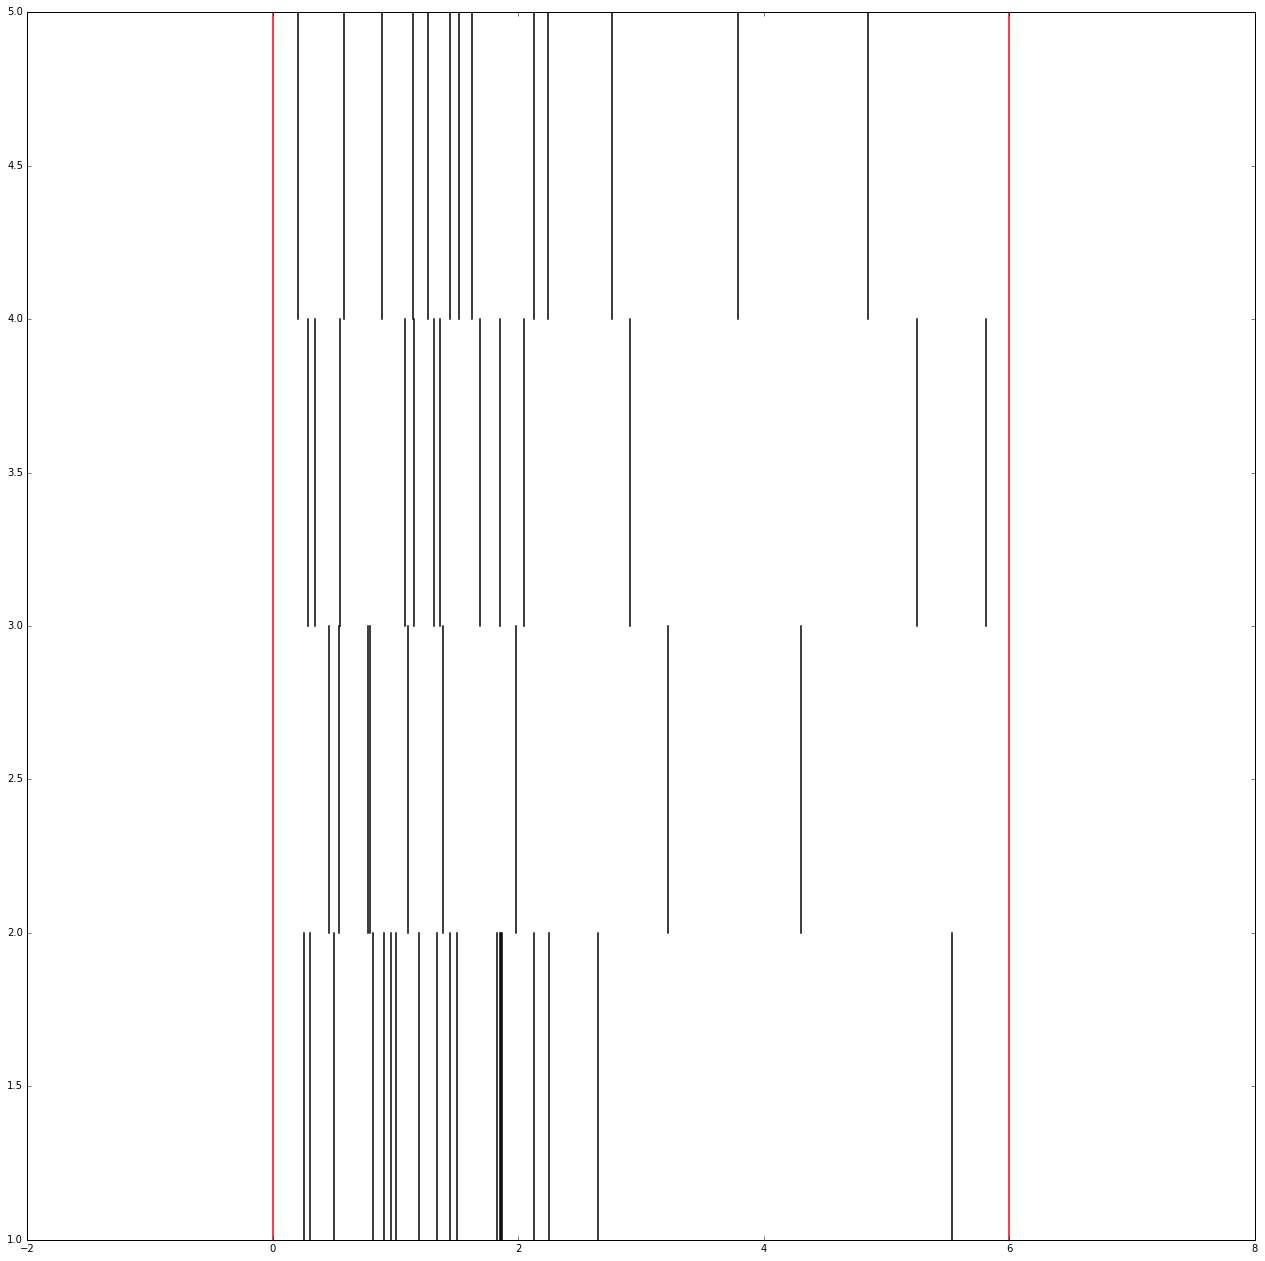

In [58]:
f = plt.figure(figsize=(22,22))
rasters.plot_raster_cell_stim(spikes, trials, 12, 'test_pipeline_stimulus', [-2, 2], 0, fs)

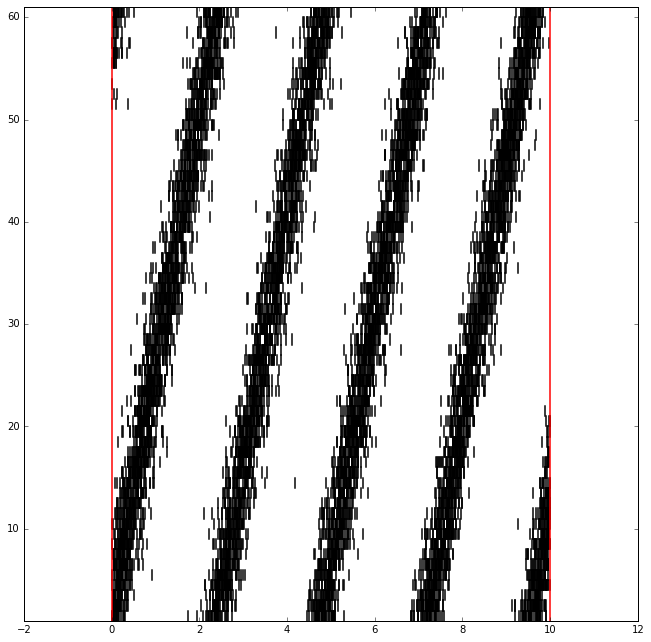

In [17]:
f = plt.figure(figsize=(11,11))
rasters.plot_raster_stim_trial(spikes, trials,'test_pipeline_stimulus', 2, [-2, 2], 0, fs)

In [19]:
def plot_raster_stim_trial(spikes, trials, stim, trial,
                           period, rec, fs, plot_params=None, ax=None):
    '''
    Plots a spike raster of all units for a given trial of a given stimulus.

    Parameters
    ----------
    spikes : pandas dataframe
        spike dataframe from core 
    trials : pandas dataframe
        trials dataframe from events
    stim : str 
        Name of the stimulus for which a raster is desired
    trial : int
        Trial number to plot. Note: Zero-indexed.
    period : list of floats 
        Time window for the raster:  
        [Seconds_pre_stimulus_onset, Seconds_post_stimulus_end]
    rec : int 
        Recording ID 
    fs : float 
        Sampling rate
    plot_params : dict
        Drawing parameters:
        'spike_linewidth' - linewidth of ticks for spikes 
        'tick_linewidth' - linewidth of ticks for event markers
        'spike_color' - color of spike ticks 
        'tick_color' - color of event ticks 
    ax : Matplotlib axes handle, optional
        Axes on which to produce the raster.  Default is to use gca 
    '''

    stim_trials = trials[trials['stimulus'] == stim]
    ntrials = len(stim_trials)
    assert trial < ntrials, "Trial does not exist: %d" % trial

    stim_start = stim_trials['time_samples'].values[trial]
    stim_end = stim_trials['stimulus_end'].values[trial]
    stim_end_seconds = (stim_end - stim_start)/fs
    window = [period[0], stim_end_seconds+period[1]]
    print window
    trial_spikes = spiketrains.calc_spikes_in_window(spikes, [stim_start, stim_end])
    print(trial_spikes)
    trial_clusters = np.unique(trial_spikes['cluster'].values)
    print(trial_clusters)
    raster_data = []
    for clu_num, clu_id in enumerate(trial_clusters):
        sptrain = spiketrains.get_spiketrain(rec, stim_start, clu_id, spikes, window, fs)
        print(sptrain)
        raster_data.append(sptrain)
    if plot_params == None:
        rasters.do_raster(raster_data, window, [0, stim_end_seconds], ax) 
    else:
        rasters.do_raster(raster_data, window, [0, stim_end_seconds], ax, 
                  spike_linewidth=plot_params['spike_linewidth'],
                  spike_color=plot_params['spike_color'],
                  tick_linewidth=plot_params['tick_linewidth'],
                  tick_color=plot_params['tick_color'])

In [ ]:
popvec_fname = '/Users/brad/experiments/B999/testbin.binned'
segment_info = {'period': 1}
cluster_group = ['Good']
win_size = 50.0
top.build_population_embedding(spikes, trials, clusters, win_size, fs, cluster_group, segment_info, popvec_fname)

In [ ]:
ttop.test_pipeline(block_path, kwikfile, bin_id, bin_def_file, n_cells, maxt, fs, dthetadt, kappa, maxfr, ncellperm, nperms)

In [ ]:
import pickle


In [ ]:
pickle.load('/Volumes/gentner/btheilma/experiments/B999/topology/0801161509/B999_S00_P00-good-50ms-stim-permuted/B999_S00_P00-good-50ms-stim-permuted-0801161509-stim-test_pipeline_stimulus-bettiPersistence.pkl')

In [ ]:
binned_file = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/binned_data/1608221332/B1235_cat_P02_S03_1-good-50ms-stim.binned'

In [ ]:
bdf = h5.File(binned_file, 'r')

In [ ]:
bds = bdf['A_scaled_burung']['0']
fs = bdf.attrs['fs']
nclus = bdf.attrs['nclus']

In [ ]:
np.round(6.5/0.049)

In [ ]:
C = top.calc_corr_raw(bds['pop_vec'], bds['windows'], fs, 1, 4, 1)

In [ ]:
C

In [ ]:
wins = bds['windows']

In [ ]:
wins

In [ ]:
wins[0, 1]

In [ ]:
wins[0, 0]

In [ ]:
wins[0,1]-wins[0,0]

In [ ]:
fs

In [ ]:
cij = top.compute_Cij_matrix(bds['pop_vec'], wins, fs, nclus, 1)

In [ ]:
cij_r = cij+np.diag(47*[np.nan])
cij_t = cij_r[~(np.isnan(cij_r).all(axis=1))]

In [ ]:
cij_tt = cij_t[~(np.isnan(cij_t).all(axis=0))]

In [ ]:
cols_to_remove = np.isnan(cij[0, :])

In [ ]:
cij_t = cij[~cols_to_remove]

In [ ]:
cij_tt = cij_t[:, ~cols_to_remove]

In [ ]:
0+np.nan

In [ ]:
cij+np.diag(47*[np.nan])

In [ ]:
cij_tt.shape

In [ ]:
np.isnan(cij_tt).any()

In [ ]:
tdf = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/topology/clique_top/2016-08-23T1548/B1235_cat_P02_S03_1-good-50ms-stim/B1235_cat_P02_S03_1-good-50ms-stim-2016-08-23T1548-CliqueTop--stim-A_scaled_burung-bettiPersistence.pkl'

In [ ]:
import pickle
tdf_f = open(tdf, 'r')
tf = pickle.load(tdf_f)

In [ ]:
tf